# TESTING THE ASTROLOGY/ZODIAC PREDICTIONS 


Recently I watched a science TV show program regarding astrology. Two men were discussing the matter and one of them mentioned that it is extremely hard to validate the astrological/zodiac/horoscope predictions as they're simply too "broad". It is also known as the so-called **[Barnum Effect](https://en.wikipedia.org/wiki/Barnum_effect)**. The phenomenon occurs when individuals believe that personality descriptions apply specifically to them, while the description can actually be applied to everyone. Seems quite relevant to astrology, doesn't it?)

![](https://inspirationfeed.com/wp-content/uploads/2020/05/Astrology-Meme-40.jpg)

So the goal of that notebook is to try testing some of the astrology claims, practice some Python data exploration tools and of course have some fun!

#### This notebook steps: 

* [Short astrology intro and my testing approach](#section-one)
* [Dataset Review](#section-two)
* [Divorces Data Exploration](#section-three)
* [Zodiac Compatibity Testing](#section-four)
* [Conclusion](#section-five)


<a id="section-one"></a>
### Short astrology intro and my testing approach

**[Astrology](https://en.wikipedia.org/wiki/Astrology)** is a very old discipline that came to us from the 2nd millennium BC and it claims to divine information about human affairs by studying the movements and relative positions of celestial objects like planets, stars and etc.
Despite the fact that our modern knowledge of celestial objects is quite advanced as what it was 3,000 years ago, many people still believe in it today.

Astrologists state the existence of the “zodiac signs” like Aries, Taurus, and etc. These signs can be assigned to every person based on their birth date and can predict much about the innate character of that individual.

As mentioned, the problem is that zodiac/astrology predictions of a person are hard to test. However, we aren’t giving up yet and there is at least one astrological thing that can somehow be validated and it’s called a “zodiac signs compatibility”. Essentially it means that some couples have higher (“good fit”) and lower (“bad fit”) chances for success in their marriage/love relationships depending on the compatibility of each other’s zodiac signs. Well… I wish it did work with my wife)


While it is hard to test the “good fit” of a couple, the “bad fit” — is much easier. We can perfectly determine a couple’s “bad fit” and usually it is called a… divorce) So the goal is to take a divorce dataset and see what is the distribution of “bad fit” and “good fit” compatibilities.

***My central assumption is: if astrology does work, then we should see fewer “good fit” couples and more “bad” ones.***

<a id="section-two"></a>
### Dataset review

I found and uploaded to Kaggle [this interesting](https://www.kaggle.com/aagghh/divorcemarriage-dataset-with-birth-dates) dataset, which is the Mexican government [official](https://datos.gob.mx/busca/dataset/registro-civil) data for the number of divorces in the city of Xalapa, Mexico and it contains approx. 4,900 divorce records. 

The beauty of this dataset is that along with the other interesting variables, it contains each partner's birth date, which is a very rare event for a public dataset. That way we can find out the partners' zodiac signs and see if they were a good or bad fit. 

Given that astrology is calling objects like planets and stars, we assume that it works irrespective of any nationalities and world places. 

So let's rock...

<a id="section-three"></a>
### Divorces Data exploration

Inviting the old fellas:

In [1]:
#import modules
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#list all files under the input directory
import os


The original dataset has columns in Spanish. I've created one with the English ones (divorces_2000-2015_translated.csv) and I am going to use it

In [2]:
#to see the data items
divorce_data = pd.read_csv('divorces_2000-2015_translated.csv')

divorce_data

,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,...,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody
0,9/6/06,Necesario,MEXICANA,18/12/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN
1,1/2/00,Voluntario,MEXICANA,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN
2,1/2/05,Necesario,MEXICANA,22/2/55,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN
3,1/2/06,Necesario,MEXICANA,20/1/64,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE
4,1/2/06,Necesario,MEXICANA,30/10/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,31/10/12,Voluntario,MEXICANA,29/10/77,MORELIA,MORELIA,MICHOACAN,MEXICO,35.0,MORELIA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,3.0,11.0,NaN,NaN
4919,31/10/13,Voluntario,MEXICANA,10/11/82,VERACRUZ,VERACRUZ,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,1.0,NaN,NaN,NaN
4920,31/10/13,Voluntario,MEXICANA,28/10/54,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,59.0,EMILIANO ZAPATA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,35.0,NaN,2.0,NaN
4921,31/12/12,Voluntario,MEXICANA,7/2/58,TLAPACOYAN,TLAPACOYAN,VERACRUZ,MEXICO,54.0,XALAPA,...,TLAPACOYAN,VERACRUZ,PREPARATORIA,NaN,PRIMARIA,NO TRABAJA,33.0,NaN,2.0,NaN


We see that there are many features for both divorced partners (males and females) and that is good. While some features like divorce, marriage date, monthly income, residence, profession - might potentially be useful, but for this warm-up exercise we want to focus on the zodiac signs and for that, we would only need the birth dates which are: 

**'DOB_partner_man'**  
**'DOB_partner_woman'**

Other features might be used in other problems/data explorations in the later notebooks. 

In [3]:
# Drop all columns except 'DOB_partner_man' and 'DOB_partner_woman'
divorce_data = divorce_data.drop(divorce_data.columns.difference(['DOB_partner_man', 'DOB_partner_woman']), axis=1)

# To view the first 5 rows
divorce_data.head()

,DOB_partner_man,DOB_partner_woman
0,18/12/75,8/1/83
1,NaN,NaN
2,22/2/55,21/3/47
3,20/1/64,NaN
4,30/10/75,13/10/78


Ok, now we've got our dataset with the DOBs only that contain 4,923 divorces

But if we look into the data we see that there are some missing values. Let's run the heatmap for those values 

<Axes: >

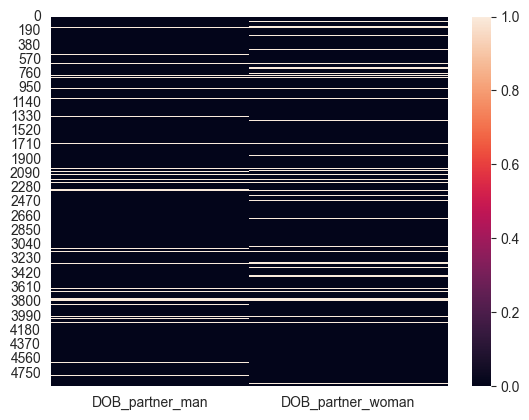

In [4]:
#heatmap for missing values
sns.heatmap(divorce_data.isnull())

Since the variable we're missing is the birth date - we cannot substitute any of these observations because we need the exact DOB for both partners in order to determine the zodiac sign

So the only way is to get rid of all missing observations

<bound method NDFrame.head of      DOB_partner_man DOB_partner_woman
0           18/12/75            8/1/83
2            22/2/55           21/3/47
4           30/10/75          13/10/78
5            28/3/73           14/6/76
6           13/12/70           4/11/71
...              ...               ...
4918        29/10/77           12/1/78
4919        10/11/82            9/2/81
4920        28/10/54           17/2/57
4921          7/2/58           27/1/64
4922         22/6/60           22/1/72

[4374 rows x 2 columns]>

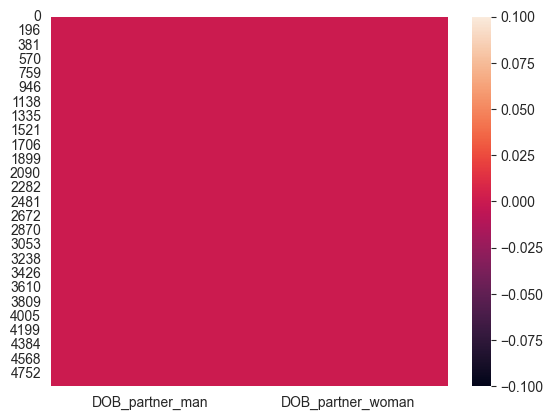

In [5]:
#deleting all missing observations
divorce_data = divorce_data.dropna()

#cheking clean data
sns.heatmap(divorce_data.isnull())

divorce_data.head

Cool, now we have a clean DOB coloums with 4,374 observations left, still pretty good. Let's check out their data types

In [6]:
#cheking data types 
divorce_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4374 entries, 0 to 4922
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOB_partner_man    4374 non-null   object
 1   DOB_partner_woman  4374 non-null   object
dtypes: object(2)
memory usage: 102.5+ KB


Looks like DOB is an object and given that we need to use these dates for our analysis, we need to convert them into the date format.

The problem is that the date format in the original dataset is in a DD/MM/YY, which might be quite inconvenient to work with

But since we don't really need years, as we only need day and month in order to determine the zodiac sign, we can get the required fields first and then just get rid of years

In [7]:
#set the right format for DOB columns 
divorce_data[['DOB_partner_man', 'DOB_partner_woman']] = divorce_data[['DOB_partner_man', 'DOB_partner_woman']].apply(pd.to_datetime)

#getting the day and month separately for both partners
divorce_data['day_partner_1'], divorce_data['month_partner_1'] = divorce_data['DOB_partner_man'].apply(lambda x: x.day), divorce_data['DOB_partner_man'].apply(lambda x: x.month)
divorce_data['day_partner_2'], divorce_data['month_partner_2'] = divorce_data['DOB_partner_woman'].apply(lambda x: x.day), divorce_data['DOB_partner_woman'].apply(lambda x: x.month)

#get rid of the DOB col as we don't need years
divorce_data = divorce_data.drop(['DOB_partner_man', 'DOB_partner_woman'], axis=1)

divorce_data.head(10)

,day_partner_1,month_partner_1,day_partner_2,month_partner_2
0,18,12,1,8
2,22,2,21,3
4,30,10,13,10
5,28,3,14,6
6,13,12,11,4
7,17,2,27,8
8,12,2,1,3
9,17,11,13,3
10,6,4,16,2
11,13,11,13,5


Cool, now we only have the month and date cols that are good to go for the zodiac sign determination. 

Generally, there are 12 zodiac signs and some astrologists argue for the 13th one, but for the simplicity of this exercise, we would take the majority of astrologists' view and take the 12 signs set-up. Here they are:



![](https://vietnamtimes.org.vn/stores/news_dataimages/dieulinhvnt/092020/24/16/medium/5403_Zodiacs-improved.png)



Let's create a function and turn all birth dates into the actual zodiac signs

In [8]:
# function for the zodiac sign determination

def zodiac_sign(day, month): 
    
    if month == 12: 
        return 'Sagittarius' if (day < 22) else 'Capricorn'

    elif month == 1: 
        return 'Capricorn' if (day < 20) else 'Aquarius'

    elif month == 2: 
        return 'Aquarius' if (day < 19) else 'Pisces'

    elif month == 3: 
        return 'Pisces' if (day < 21) else 'Aries'

    elif month == 4: 
        return 'Aries' if (day < 20) else 'Taurus'

    elif month == 5: 
        return 'Taurus' if (day < 21) else 'Gemini'

    elif month == 6: 
        return 'Gemini' if (day < 21) else 'Cancer'

    elif month == 7: 
        return 'Cancer' if (day < 23) else 'Leo'

    elif month == 8: 
        return 'Leo' if (day < 23) else 'Virgo'

    elif month == 9: 
        return 'Virgo' if (day < 23) else 'Libra'

    elif month == 10: 
        return 'Libra' if (day < 23) else 'Scorpio'

    elif month == 11: 
        return 'Scorpio' if (day < 22) else 'Sagittarius'

In [9]:
#creating additional cols for zodiac signs for both partners

divorce_data['Zod_sign_partner_1'] = divorce_data.apply(lambda x: zodiac_sign(x['day_partner_1'], x['month_partner_1']), axis=1)
divorce_data['Zod_sign_partner_2'] = divorce_data.apply(lambda x: zodiac_sign(x['day_partner_2'], x['month_partner_2']), axis=1)


In [10]:
#checking our zodiac signs do make sense
divorce_data.head(10)

,day_partner_1,month_partner_1,day_partner_2,month_partner_2,Zod_sign_partner_1,Zod_sign_partner_2
0,18,12,1,8,Sagittarius,Leo
2,22,2,21,3,Pisces,Aries
4,30,10,13,10,Scorpio,Libra
5,28,3,14,6,Aries,Gemini
6,13,12,11,4,Sagittarius,Aries
7,17,2,27,8,Aquarius,Virgo
8,12,2,1,3,Aquarius,Pisces
9,17,11,13,3,Scorpio,Pisces
10,6,4,16,2,Aries,Aquarius
11,13,11,13,5,Scorpio,Taurus


In [11]:
divorce_data.drop(divorce_data.columns.difference(['Zod_sign_partner_1', 'Zod_sign_partner_2']), axis=1, inplace=True)
divorce_data.head(10)

,Zod_sign_partner_1,Zod_sign_partner_2
0,Sagittarius,Leo
2,Pisces,Aries
4,Scorpio,Libra
5,Aries,Gemini
6,Sagittarius,Aries
7,Aquarius,Virgo
8,Aquarius,Pisces
9,Scorpio,Pisces
10,Aries,Aquarius
11,Scorpio,Taurus


Looks cool. So now we can do some visuals on them 

Text(0, 0.5, 'count of zodiacs')

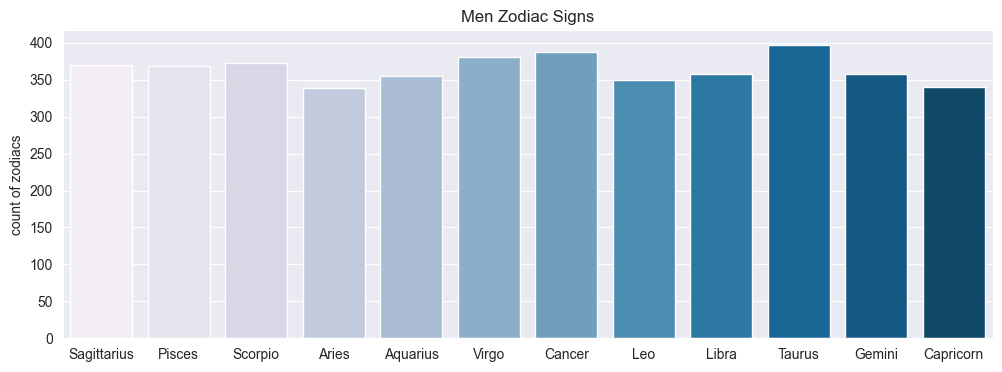

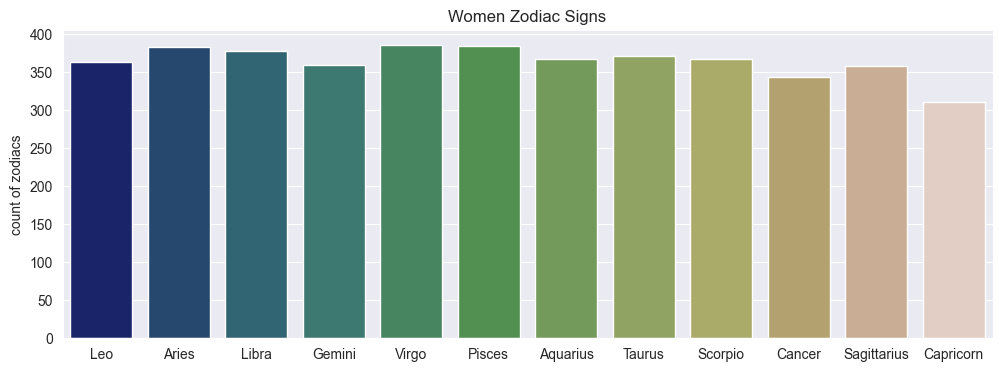

In [12]:
#plotting a chart for a number of men zodiac signs across the data
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Zod_sign_partner_1", data=divorce_data, palette="PuBu").set_title('Men Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

#making a one for women 
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Zod_sign_partner_2", data=divorce_data, palette="gist_earth").set_title('Women Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

Most of the signs are quite equally distributed. However, as we're trying to test the zodiacs compatibility, we are not looking into the individual zodiac signs, but into their combinations. 

There are 12 zodiac signs for both partners and that means 144 possible combinations. So let's first look into them:

In [13]:
#creating a matrix for the zodiac signs combinations (man+woman)
adjacency_matrix = pd.crosstab(divorce_data.Zod_sign_partner_1, divorce_data.Zod_sign_partner_2)
idx = adjacency_matrix.columns.union(adjacency_matrix.index)
adjacency_matrix = adjacency_matrix.reindex(index = idx, columns=idx, fill_value=0)
adjacency_matrix.head(12)

,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
Aquarius,35,34,28,26,32,32,23,24,26,34,32,29
Aries,35,23,25,27,29,35,32,24,28,24,30,27
Cancer,40,33,35,21,21,31,36,43,32,35,24,36
Capricorn,26,33,29,28,31,31,13,39,33,27,25,25
Gemini,29,29,22,28,30,40,36,25,22,32,30,34
Leo,24,25,28,20,35,28,31,28,29,27,40,34
Libra,29,29,29,21,29,25,35,32,26,30,37,35
Pisces,25,40,28,33,25,25,35,33,33,32,33,27
Sagittarius,35,37,33,26,26,25,35,24,36,27,32,34
Scorpio,33,35,23,31,24,27,38,33,28,33,36,32


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143],
 [Text(0, 0, 'SagittariusLeo'),
  Text(1, 0, 'PiscesAries'),
  Text(2, 0, 'ScorpioLibra'),
  Text(3, 

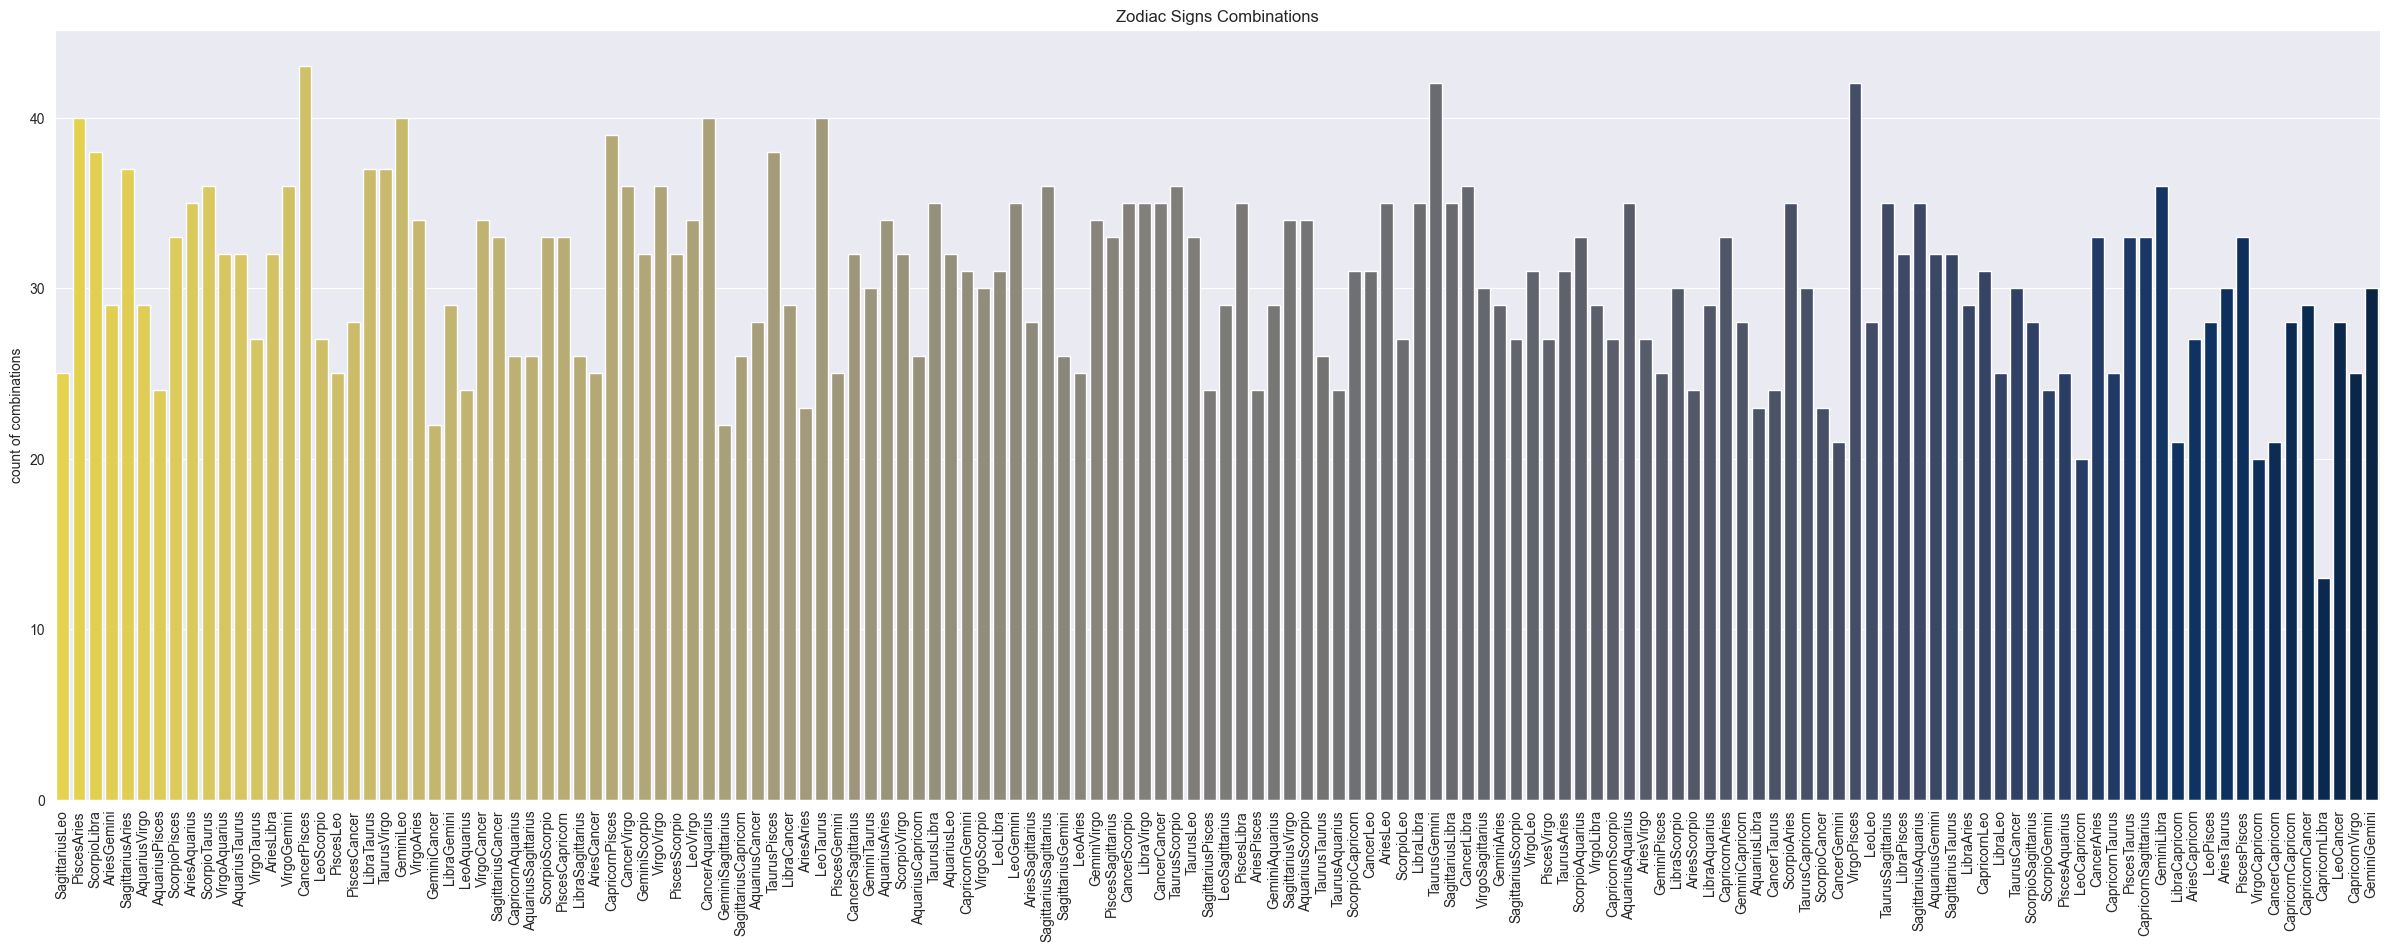

In [14]:
#creating an additional col for the zodiac combinations
divorce_data['Zodiac_combinations'] = divorce_data['Zod_sign_partner_1'] + divorce_data['Zod_sign_partner_2']

#plotting a chart for combinations
plt.figure(figsize=(30,10))
plot = sns.countplot(x="Zodiac_combinations", data=divorce_data, palette="cividis_r").set_title('Zodiac Signs Combinations')
plt.xlabel("")
plt.ylabel("count of combinations")
plt.xticks(rotation=90)


Text(0.5, 0, '')

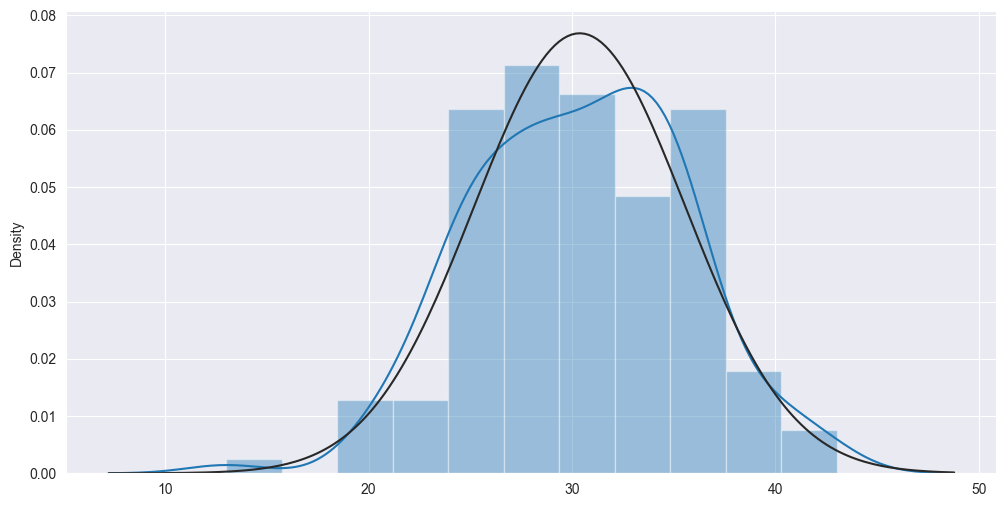

In [15]:
#see the histogram for the normal distribution
plt.figure(figsize=(12,6))
sns.distplot(divorce_data['Zodiac_combinations'].value_counts(), fit=norm);
plt.xlabel("")

It is good that we got all of the possible 144 combinations within our dataset range and that at least tells us the size of the dataset is large enough. Only the Man+Woman (partner_1+partner_2) zodiac combinations were considered as I couldn't find any zodiac methodology in the marriage outcomes prediction that is taking an individual's sex into consideration.   

It seems like the count of different combinations ranges from 13 (least) to 42 (most) and it looks like the combinations aren't quite normally distributed with some negative skewness.

So probably there is still a chance that we get some correlations between "bad fit" combinations and divorces within this dataset. 

<a id="section-four"></a>
### 4. Zodiac Compatibity Testing

So how do we know a "good" or "bad" marriage/relationship fit from the astrology standpoint?

I searched that for a bit on the web and finally came up with this [website](https://numerologysign.com/astrology/zodiac/compatibility/) and this "Zodiac Compatibility Matrix":

![](https://numerologysign.com/wp-content/uploads/2020/03/Astrological-Zodiac-Signs-Compatibility-Chart.png)

- it has a relatively high web [traffic](https://www.similarweb.com/website/numerologysign.com?utm_source=addon&utm_medium=chrome&utm_content=header&utm_campaign=cta-button&from_ext=1) with 680k+ monthly visits

- the author of that compatibility matrix is a member of the [National Council of Geocosmic Research](https://geocosmic.org/) and holds a Level II Certification from this organization. Yes, there are Councils in Astrology and they probably even get some funding...

- at the end of the day: all of these "zodiac compatibility" tables/matrix give very similar compatibilities across each other

Let's upload and plot this matrix in a .csv version:

In [16]:
#upload the above compatibility matrix from a .csv 
comp_matrix = pd.read_csv('Comp_matrix.csv')

comp_matrix.head(10) #compatibility rate - %

,Zodiac_combination,Compatibility_rate
0,CancerPisces,0.98
1,TaurusGemini,0.33
2,VirgoPisces,0.88
3,PiscesAries,0.67
4,CancerAquarius,0.27
5,GeminiLeo,0.88
6,LeoTaurus,0.73
7,CapricornPisces,0.88
8,ScorpioLibra,0.35
9,TaurusPisces,0.85


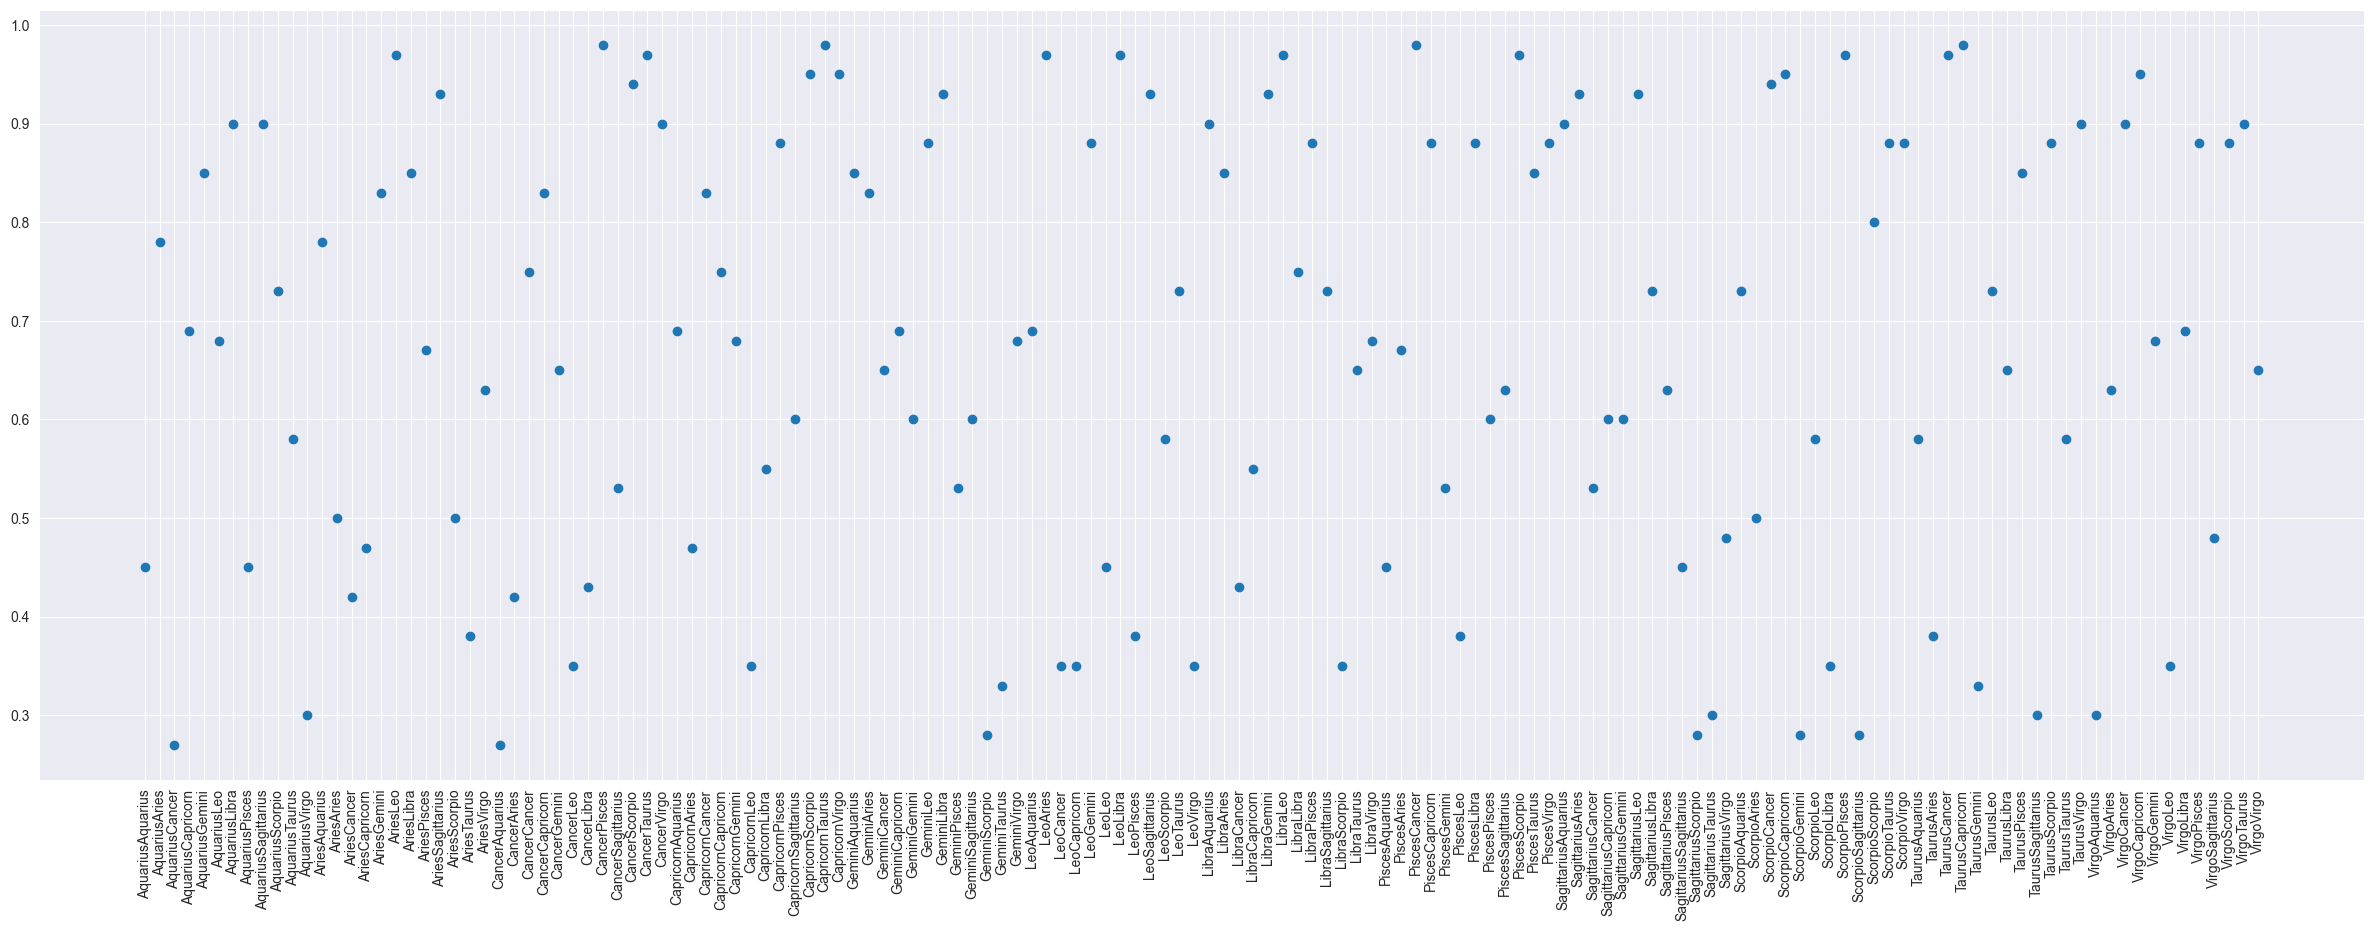

In [17]:
#making a scatter plot

plt.figure(figsize=(30,10))
x, comb = np.unique(comp_matrix['Zodiac_combination'], return_inverse=True)
plt.scatter(comb, comp_matrix['Compatibility_rate'])
plt.xticks(range(len(x)), x)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, '')

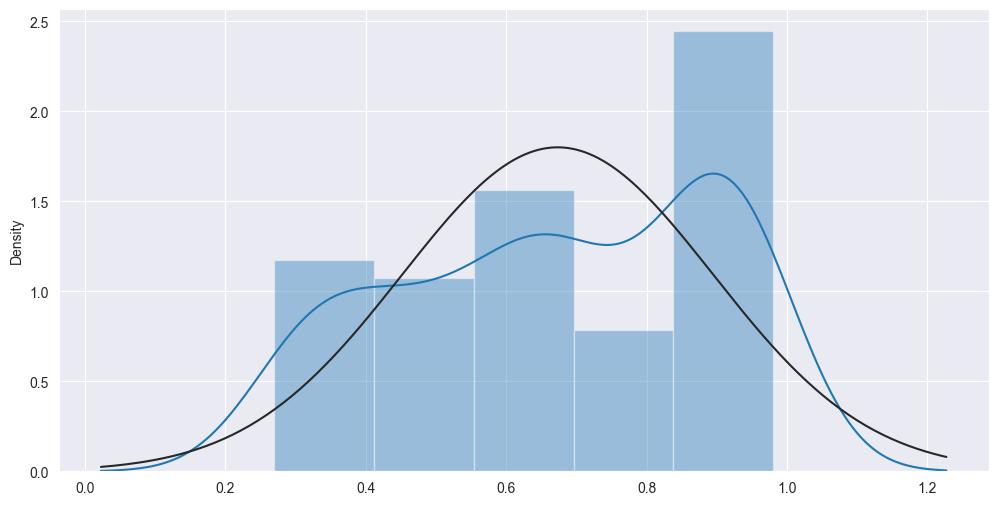

In [18]:
#see the histogram for the normal distribution
plt.figure(figsize=(12,6))
sns.distplot(comp_matrix['Compatibility_rate'], fit=norm);
plt.xlabel("")

In [19]:
#see the max/min, mean etc.
comp_matrix['Compatibility_rate'].describe()

count    144.000000
mean       0.673472
std        0.222363
min        0.270000
25%        0.480000
50%        0.680000
75%        0.880000
max        0.980000
Name: Compatibility_rate, dtype: float64

The zodiac compatibility matrix simply shows how good the zodiac signs fit each other in the range of 1 to 100% from the astrology point of view. Now we need to determine the "bad" and "good" fits, but where is the borderline for that? Given it is 1-100%, should we simply put 50%? 

From the histogram, we see that the compatibilities aren't well-distributed from 1 to 100% and they are quite positively skewed into the second 50%. Well, this is what astrology says and we have to deal with that. As seen from the describe() function - the minimum compatibility is 27% - obviously the bad fit, and the maximum compatibility of 98% is definitely a good one.  Also, the standard deviation is 0.22 and the mean is 0.67, so 0.5 (50%) isn't really a good idea here as we have many more zodiac sign combinations in the 50-100% range. 

Probably the good idea is to ask Pandas pd.qcut() function to help us. It will divide the range into equal-sized buckets based on sample quantiles (medians). In the below example I divide the range into 2 categories with one median, but this awesome function gives an option to split any dataset/range into many chunks using quantiles and multiple medians.

In [20]:
#setting the categories
compatibility_fit_labels = ['Bad_fit', 'Good_fit']

#creating a new col for the categories
comp_matrix['Compatibility'] = pd.qcut(comp_matrix['Compatibility_rate'], q= [0, .5, 1], labels=compatibility_fit_labels)

In [21]:
#seeing how many values in each category
comp_matrix['Compatibility'].value_counts()

Compatibility
Bad_fit     73
Good_fit    71
Name: count, dtype: int64

We see that the categories' aren't exactly equal, but that is fine since it's a small difference (73 vs. 71) and I think we can live with that 

So I am going to join my two data frames (comp_matrix & divorce_data) and see how the newly created compatibility column would be distributed in the actual divorce dataset as this is our end goal!

In [22]:
#rename the col for future dataframes join
comp_matrix = comp_matrix.rename(columns={'Zodiac_combination': 'Zodiac_combinations'})

#joining the datframes
cols = ['Zodiac_combinations']
divorce_data = divorce_data.join(comp_matrix.set_index(cols), on=cols)

divorce_data

,Zod_sign_partner_1,Zod_sign_partner_2,Zodiac_combinations,Compatibility_rate,Compatibility
0,Sagittarius,Leo,SagittariusLeo,0.93,Good_fit
2,Pisces,Aries,PiscesAries,0.67,Bad_fit
4,Scorpio,Libra,ScorpioLibra,0.35,Bad_fit
5,Aries,Gemini,AriesGemini,0.83,Good_fit
6,Sagittarius,Aries,SagittariusAries,0.93,Good_fit
...,...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28,Bad_fit
4919,Libra,Virgo,LibraVirgo,0.68,Bad_fit
4920,Scorpio,Aquarius,ScorpioAquarius,0.73,Good_fit
4921,Cancer,Aquarius,CancerAquarius,0.27,Bad_fit


Woohhoo! Finally we're done and we can see how the zodiac compatibilities influence the divorce...

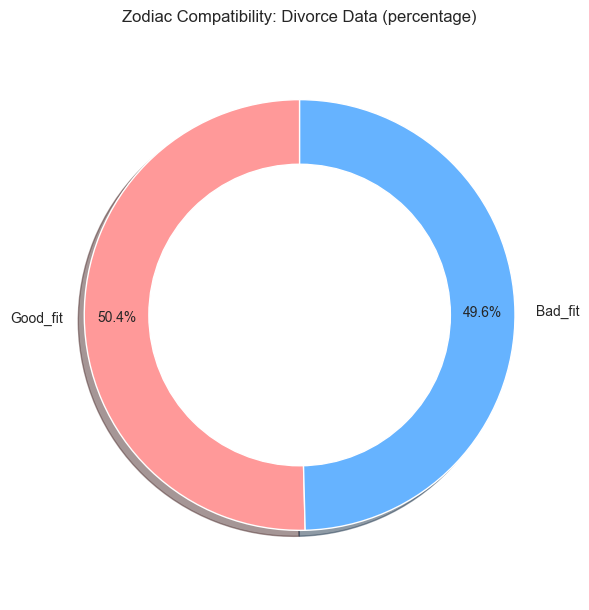

In [23]:
# plotting a pie chart, to see how actually zodiac compatibility is distributed across the divorce dataset in percentage

labels = ['Good_fit', 'Bad_fit']
sizes = divorce_data['Compatibility'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(6,6)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Zodiac Compatibility: Divorce Data (percentage)')
plt.show()

Text(0, 0.5, '')

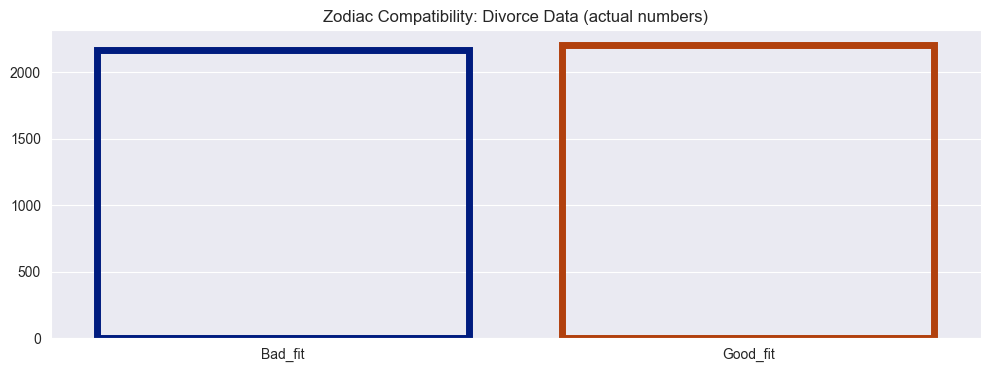

In [24]:
#plotting a chart to see how zodiac compatibility is distributed across the divorce dataset in actual numbers
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Compatibility", data=divorce_data, facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3)).set_title('Zodiac Compatibility: Divorce Data (actual numbers)')
plt.xlabel("")
plt.ylabel("")

Oh well...

In [25]:
#see the number 
divorce_data['Compatibility'].value_counts()

Compatibility
Good_fit    2205
Bad_fit     2169
Name: count, dtype: int64

Essentially, in case if astrology was right, we should have seen significantly less good fits and much more bad fits in the divorce data.

But we actually see that there is an almost perfect 50/50 distribution of "bad" and "good" fit compatibilities. It's funny that we even got a little bit more of 'good' compatibilities (50.4% vs 49.6%)

What that means is that there is an equal probability for divorced people to have a good or bad zodiac fit and it's highly unlikely the zodiac signs had any effect on the individuals' divorces. At least in that particular case with the 4374 number of divorces in Xalapa, Mexico...

Next time astrology, next time...

<a id="section-five"></a>
### Conclusion

That was a warm-up exercise with the aim to do some data exploration and have some fun.

**What potentially could have been wrong:**

- Find a better zodiac compatibility matrix that has a normal distribution and isn't skewed into the 50-100% range. However, this is hard as they're all very similar across various astrology resources

- We need more data. 4.3k of divorces isn't that much, but generally, it's not easy to find public marriage/divorce datasets with the individuals' DOBs

- Probably more factors should be taken into account from the astrology standpoint. Not only signs but also actual dates probably should be considered, the exact time the person was born, sex, year and etc.

- Testing and the assumptions approach is completely incorrect (feel free to comment)

Anyway hope you find the exercise entertaining and will be careful about the astrology predictions in your real-life affairs. If you like this notebook and the dataset, giving some kind of credit would be very much appreciated :) Thanks!

In [26]:
divorce_data

,Zod_sign_partner_1,Zod_sign_partner_2,Zodiac_combinations,Compatibility_rate,Compatibility
0,Sagittarius,Leo,SagittariusLeo,0.93,Good_fit
2,Pisces,Aries,PiscesAries,0.67,Bad_fit
4,Scorpio,Libra,ScorpioLibra,0.35,Bad_fit
5,Aries,Gemini,AriesGemini,0.83,Good_fit
6,Sagittarius,Aries,SagittariusAries,0.93,Good_fit
...,...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28,Bad_fit
4919,Libra,Virgo,LibraVirgo,0.68,Bad_fit
4920,Scorpio,Aquarius,ScorpioAquarius,0.73,Good_fit
4921,Cancer,Aquarius,CancerAquarius,0.27,Bad_fit


In [27]:
divorce_data['Compatibility']

0       Good_fit
2        Bad_fit
4        Bad_fit
5       Good_fit
6       Good_fit
          ...   
4918     Bad_fit
4919     Bad_fit
4920    Good_fit
4921     Bad_fit
4922     Bad_fit
Name: Compatibility, Length: 4374, dtype: category
Categories (2, object): ['Bad_fit' < 'Good_fit']

In [28]:
compatibility_map = {'Bad_fit': 0, 'Good_fit': 1}

divorce_data['encoded_fitness'] = divorce_data['Compatibility'].map(compatibility_map)
divorce_data

,Zod_sign_partner_1,Zod_sign_partner_2,Zodiac_combinations,Compatibility_rate,Compatibility,encoded_fitness
0,Sagittarius,Leo,SagittariusLeo,0.93,Good_fit,1
2,Pisces,Aries,PiscesAries,0.67,Bad_fit,0
4,Scorpio,Libra,ScorpioLibra,0.35,Bad_fit,0
5,Aries,Gemini,AriesGemini,0.83,Good_fit,1
6,Sagittarius,Aries,SagittariusAries,0.93,Good_fit,1
...,...,...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28,Bad_fit,0
4919,Libra,Virgo,LibraVirgo,0.68,Bad_fit,0
4920,Scorpio,Aquarius,ScorpioAquarius,0.73,Good_fit,1
4921,Cancer,Aquarius,CancerAquarius,0.27,Bad_fit,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
features = divorce_data[['Zod_sign_partner_1', 'Zod_sign_partner_2']]

features['Zod_sign_partner_1'] = encoder.fit_transform(features['Zod_sign_partner_1'])
features['Zod_sign_partner_2'] = encoder.fit_transform(features['Zod_sign_partner_2'])

target = divorce_data['encoded_fitness']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       210

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



In [30]:
features

,Zod_sign_partner_1,Zod_sign_partner_2
0,8,5
2,7,1
4,9,6
5,1,4
6,8,1
...,...,...
4918,9,8
4919,6,11
4920,9,0
4921,2,0


In [31]:
X_test

,Zod_sign_partner_1,Zod_sign_partner_2
1760,6,10
520,3,2
1809,7,7
1661,10,6
4294,9,11
...,...,...
2059,8,11
4708,9,7
4324,11,7
4559,7,11


In [33]:
day_1 = int(input("Enter birth day of partner 1"))
month_1 = int(input("Enter birth month of partner 1"))
day_2 = int(input("Enter birth day of partner 2"))
month_2 = int(input("Enter birth month of partner 2"))

zodiac_sign1, zodiac_sign2 = zodiac_sign(day=day_1, month=month_1), zodiac_sign(day=day_2, month=month_2)
testing = pd.DataFrame({"Zod_sign_partner_1" : [zodiac_sign1], "Zod_sign_partner_2" :[zodiac_sign2]})
print(testing)
zodiac_sign_dict = {name: encoded for name, encoded in zip(divorce_data["Zod_sign_partner_1"], features["Zod_sign_partner_1"])}
testing["Zod_sign_partner_1"] = testing["Zod_sign_partner_1"].map(zodiac_sign_dict)
testing["Zod_sign_partner_2"] = testing["Zod_sign_partner_2"].map(zodiac_sign_dict)


#Used for testing - good fit
# testing2_day_1 = 18
# testing2_month_1 = 12
# testing2_day_2 = 1
# testing2_month_2 = 8

testing2 = pd.DataFrame({"Zod_sign_partner_1" :[8], "Zod_sign_partner_2" :[5]})
results2 = rf.predict(testing2)

results = rf.predict(testing)
print(testing)
if results[0] == 0:
    print("Bad_Fit")
else:
    print("Good_Fit")

  Zod_sign_partner_1 Zod_sign_partner_2
0            Scorpio            Scorpio
   Zod_sign_partner_1  Zod_sign_partner_2
0                   9                   9
Good_Fit


In [ ]:
#Used the value only for testing
key1, key2 = [k for k, v in zodiac_sign_dict.items() if v == testing2["Zod_sign_partner_1"][0]], [k for k, v in zodiac_sign_dict.items() if v == testing2["Zod_sign_partner_2"][0]]
testing2_signs = pd.DataFrame({"Zod_sign_partner_1":key1, "Zod_sign_partner_2":key2})

print(testing2_signs)

print(testing2)
if results2[0] == 0:
    print("Bad_Fit")
else:
    print("Good_Fit")

In [ ]:
zodiac_sign_dict_1 = {name: encoded for name, encoded in zip(divorce_data["Zod_sign_partner_1"], features["Zod_sign_partner_1"])}

In [ ]:
zodiac_sign_dict_1